# Agglomerative Clustering Implementation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [7]:
# credit card data
df = pd.read_csv('D:\ML training\python\CC GENERAL.csv')

In [8]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Drop CUST_ID column

In [9]:
df = df.drop('CUST_ID', axis = 1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Filling missing values

In [10]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
df.fillna(method ='ffill' ,inplace = True)

In [15]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Scaling the data

In [22]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3053336 ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08714014,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10010994,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32935392,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34057185,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.32688396,
        -0.52555097, -4.12276757]])

#### Gaussion Distribution

In [20]:
df_normalized = normalize(df_scaled)
df_normalized

array([[-0.31203754, -0.10633067, -0.18112923, ..., -0.13015974,
        -0.22403554,  0.153753  ],
       [ 0.21992844,  0.03753912, -0.13122357, ...,  0.02435267,
         0.06545835,  0.1007975 ],
       [ 0.1266835 ,  0.14678487, -0.03050485, ..., -0.02836341,
        -0.14890049,  0.10218868],
       ...,
       [-0.15698874, -0.03932717, -0.08522984, ..., -0.06983386,
         0.06980122, -0.8741623 ],
       [-0.15433414, -0.03841436, -0.09724958, ..., -0.07053634,
         0.0681811 , -0.85387249],
       [-0.11521665, -0.17889603,  0.00848081, ..., -0.06577735,
        -0.1057542 , -0.82960552]])

#### Converting the numpy array into a pandas Dataframe

In [21]:
df_normalized = pd.DataFrame(df_normalized)
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435


#### Reduce the dimentionality of the data

#### Apply PCA

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components =2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P1', 'P2']

In [25]:
print(df_principal['P1'])

0      -0.489949
1      -0.519099
2       0.330633
3      -0.481657
4      -0.563512
          ...   
8945    0.328693
8946    0.259752
8947    0.188818
8948   -0.313093
8949    0.012841
Name: P1, Length: 8950, dtype: float64


In [26]:
print(df_principal['P2'])

0      -0.679976
1       0.544827
2       0.268879
3      -0.097610
4      -0.482506
          ...   
8945   -0.198293
8946   -0.176867
8947   -0.248155
8948   -0.171112
8949    0.098423
Name: P2, Length: 8950, dtype: float64


####  visualizing the cluster

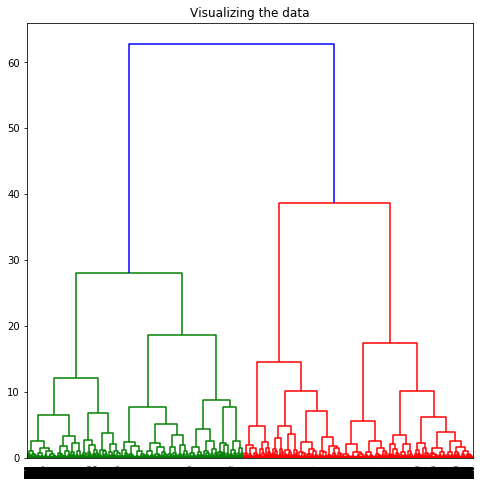

In [28]:
plt.figure(figsize = (8,8))
plt.title('Visualizing the data')
Dendrogram = shc.dendrogram(shc.linkage(df_principal, method = 'ward'))

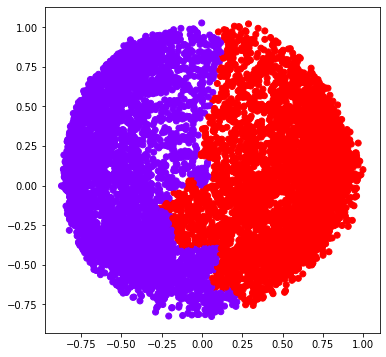

In [34]:
ac2 = AgglomerativeClustering(n_clusters = 2)

# visualizing the clustering
plt.figure(figsize = (6,6))
plt.scatter(df_principal['P1'], df_principal['P2'], c = ac2.fit_predict(df_principal), cmap = 'rainbow')
plt.show()

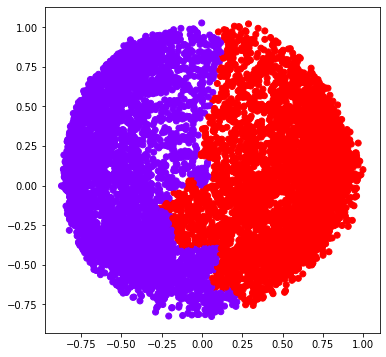

In [35]:
ac3 = AgglomerativeClustering(n_clusters = 3)

# visualizing the clustering
plt.figure(figsize = (6,6))
plt.scatter(df_principal['P1'], df_principal['P2'], c = ac2.fit_predict(df_principal), cmap = 'rainbow')
plt.show()

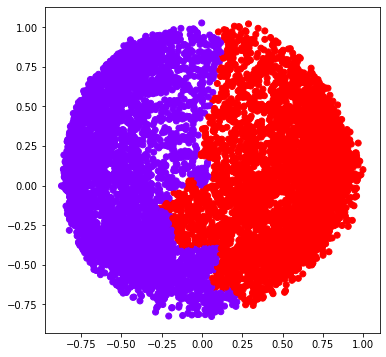

In [36]:
ac4 = AgglomerativeClustering(n_clusters = 4)

# visualizing the clustering
plt.figure(figsize = (6,6))
plt.scatter(df_principal['P1'], df_principal['P2'], c = ac2.fit_predict(df_principal), cmap = 'rainbow')
plt.show()

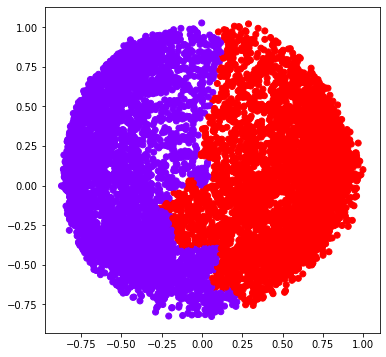

In [37]:
ac5 = AgglomerativeClustering(n_clusters = 5)

# visualizing the clustering
plt.figure(figsize = (6,6))
plt.scatter(df_principal['P1'], df_principal['P2'], c = ac2.fit_predict(df_principal), cmap = 'rainbow')
plt.show()

#### Evalutaing the difference models and visualizing results

In [39]:
k = [2,3,4,5]
silhouette_scores = []

silhouette_scores.append(silhouette_score(df_principal, ac2.fit_predict(df_principal)))
silhouette_scores.append(silhouette_score(df_principal, ac3.fit_predict(df_principal)))
silhouette_scores.append(silhouette_score(df_principal, ac4.fit_predict(df_principal)))
silhouette_scores.append(silhouette_score(df_principal, ac5.fit_predict(df_principal)))

#### Ploting a bar graph to compare the results

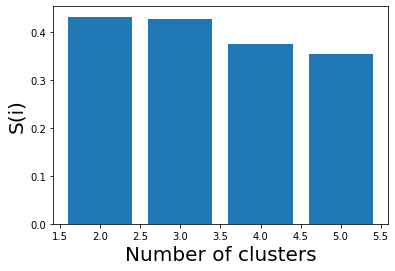

In [40]:
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize =20)
plt.ylabel('S(i)', fontsize=20)
plt.show()